## Assignment 1 
### Anmol Aggarwal 16009258

**Question 1**: Given the vector $p$-norm $\|x\|_p = \left(\sum_{j=1}^n|x|^p\right)^{1/p}$ for $1 \leq p < \infty$ and $x\in\mathbb{R}^n$. Use the triangle inequality to show that the unit ball $S_B := \{x\in\mathbb{R}^n:~\|x\|_p\leq 1\}$ is convex. Note: A set $S$ is convex if for any $x, y\in S$ the points $tx + (1-t)y$ are also in $S$ for $0\leq t\leq 1$.


**Solution:** Choose arbitrary vectors $x,y\in S_B$ $\implies$ $\|x\|_p\leq 1$ and $\|y\|_p\leq 1.$ Consider $\|tx + (1-t)y\|_p$ where $0\leq t\leq 1$ and $t\in\mathbb{R}$. Thus: $\|tx + (1-t)y\|_p\leq \|tx\|_p + \|(1-t)y \|_p  =  |t|\|x\|_p + |1-t|\|y\|_p\leq |t| + |1-t| = 1 $ using axioms Norm Axioms. Since $\|tx + (1-t)y\|_p\leq 1\implies\ (tx + (1-t)y)\in S_B\implies S_B$ is convex $\forall x,y\in S_B$ $\square$            


**Question 2:** Show that for $ 0 < p < 1$ the $p$-norm does not satisfy the triangle inequality. Hint: Consider the line between two unit vectors $e_1$ and $e_2$ and show that the $p$-norm is not convex.


**Solution:** Need to consider $p$-norm, $\|x\|_p = \left(\sum_{j=1}^n|x|^p\right)^{1/p}$ for $0<p<1$ and show that $\exists x,y\in\mathbb{R}^n$ such that Triangular Inequalities are not satisfied. 
Let us consider two unit vectors $x=e_1$ and $y=e_2$ such that $\|e_1\|_p=1$ and $\|e_2\|_p=1.$ Note 
$$\|e_1\|_p+\|e_2\|_p=2\quad and\quad \|e_1+e_2\|_p = 2^{1/p}>2\ as\ \frac{1}{p}>1$$ Thus we have shown that $\exists x,y\in\mathbb{R}^n$ such that $\|x+y\|_p\nleq\|x\|_p+\|y\|_p \implies$ Triangular Inequalities are $not$ satisfied for $0<p<1$. $\square$ 

**Question 3:** Write a code that plots for given p the boundary of the unit sphere of the $\|\cdot\|_p$-norm in $\mathbb{R}^2$. Show plots for $p=1$, $p=2$, and $p=10$.


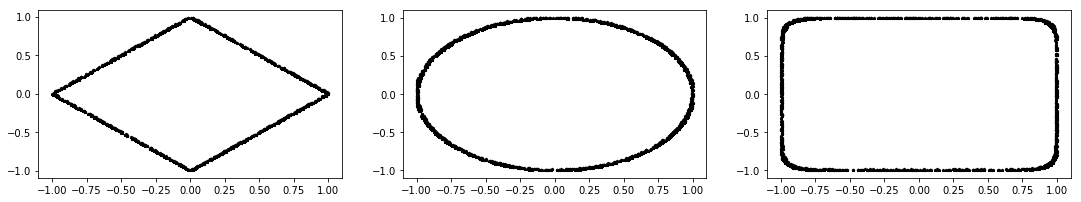

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n = 2 
def plotunitsphere(p): 
    for i in range(50000):   #50000 random vectors are generated
        v = np.random.uniform(-1,1,(n))  #randomly picks 2x1 vectors which each entry in range [-1,1)
        if  0.99<=np.linalg.norm(v,p)<=1.01:   #Boundary Condition
            plt.plot(v[0],v[1],'k*',markersize=3)  #Each point is shown as a dot
            plt.gcf().set_size_inches(18.5, 10.5)  #Enlarges the Subplots after they have been created
            
plt.subplot(331)             
p_1 = plotunitsphere(1)
plt.subplot(332)
p_2= plotunitsphere(2)
plt.subplot(333)
p_10 = plotunitsphere(10)

**Question 4:** Compute the relative condition number of $f(x) = \log x$. When is the condition number the largest? Try to give an explanation.



**Solution:** We know that $f(x)=log(x)$ is a differentiable function $\forall x\in\mathbb{R}^+.$ Then we can apply $\kappa(x) = \frac{\|J(x)\|}{\|f(x)\|/\|x\|}$, where $J(x)$ is the Jacobian of $f$ at $x.$ 
Observe that $\|J(x)\| = \|f^\prime(x)\| = \frac{1}{\|x\|}.$ Therefore: $$\kappa(x) = \frac{\frac{1}{\|x\|}}{\|log(x)\|/\|x\|} = \frac{1}{\|log(x)\|}$$
When $$x\rightarrow 1,\ log(x)\rightarrow 0\implies\kappa(x)\rightarrow\infty$$ 
In other words, an infinitesimal change in input $\delta x$, can yield a significant change in output $\delta f$ at $x=1.$ Hence $f(x) = \log x$ is ill-conditioned i.e. $\kappa(x)=\infty$ when $x=1$ $\square$ 


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


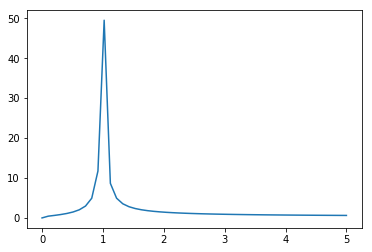

'Graph clearly shows a jump as x--> 0 and Condition number --> Inf'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,50)
plt.plot(x,abs(np.float64(1/np.log(x))))  
plt.show()
'''Graph clearly shows a jump as x--> 0 and Condition number --> Inf'''

**Question 5:** Devise an algorithm to estimate the condition number of a matrix $A$ using randomly perturbed solves $(A+E)x = b$ for some fixed $b$ and a given matrix $E$ with $\|E\|_F\leq \delta$. Test the algorithm on the Hilbert Matrix of dimension $10$ obtained through the function `scipy.linalg.hilbert` and the value $\delta \approx 10^{-10}$. Compare your result with the exact condition number obtained through `np.linalg.cond(A)`.

**Solution:**  This algorithm estimates the $Condition\ Number\ \kappa(A)$ of a square matrix $A$: 
$$\kappa(A) = \lim_{\delta\rightarrow 0} \sup_{\|\delta x\|\leq \delta}\left(\frac{|\delta x\|}{\|x\|}/\frac{\|E\|}{\|A\|}\right)$$ where $$F_{error}=\frac{\|\delta x\|}{\|x\|}\quad and \quad \ B_{error} = \frac{\|E\|}{\|A\|}$$ 


In [17]:
import numpy as np 
from scipy.linalg import hilbert
'''Estimates the Condition Number of an arbitrary matrix A '''

def K(A,delta,n): 
    condA = []
    x= np.random.rand(n)   
    for i in range(100000):
        E = np.random.uniform(-delta/n,delta/n,(n,n))  #I have bounded each entry of matrix E in such a way that ||E||<=delta  
        x_error = -np.dot(np.dot(np.linalg.inv(A),E),x)   #x_error = -A^-1Ex
        forw = np.linalg.norm(x_error,2)/np.linalg.norm(x,2) #Forward Error
        back = np.linalg.norm(E,2)/(np.linalg.norm(A,2))   #Backward Error
        kapa = forw/back     #Condition Number for each E
        condA.append(kapa)
    return  np.max(condA) #as per the definition of Condition Number, you calculate the supremum

H = hilbert(10)
print('Actual Kappa for Hilbert: %e' %np.linalg.cond(H))
kappaH = K(H,1e-10,10)
print('Estimation of Kappa for Hilbert: %e' %kappaH)
print('Accuracy: %0.2f' %(((np.float64(kappaH)/np.linalg.cond(H))*100)) + '%')

Actual Kappa for Hilbert: 1.602503e+13
Estimation of Kappa for Hilbert: 1.202763e+13
Accuracy: 75.06%
